In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load and prepare the data
df = pd.read_csv("myExpenses1.csv")
# Changed the format string to '%d/%m/%Y' to match the date format in the CSV
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Create a new column for the day of the week (0=Monday, 6=Sunday) before setting 'Date' as index
df['Weekday'] = df['Date'].dt.day_name()
df.set_index('Date', inplace=True) # Now set 'Date' as the index

QUESTION 1


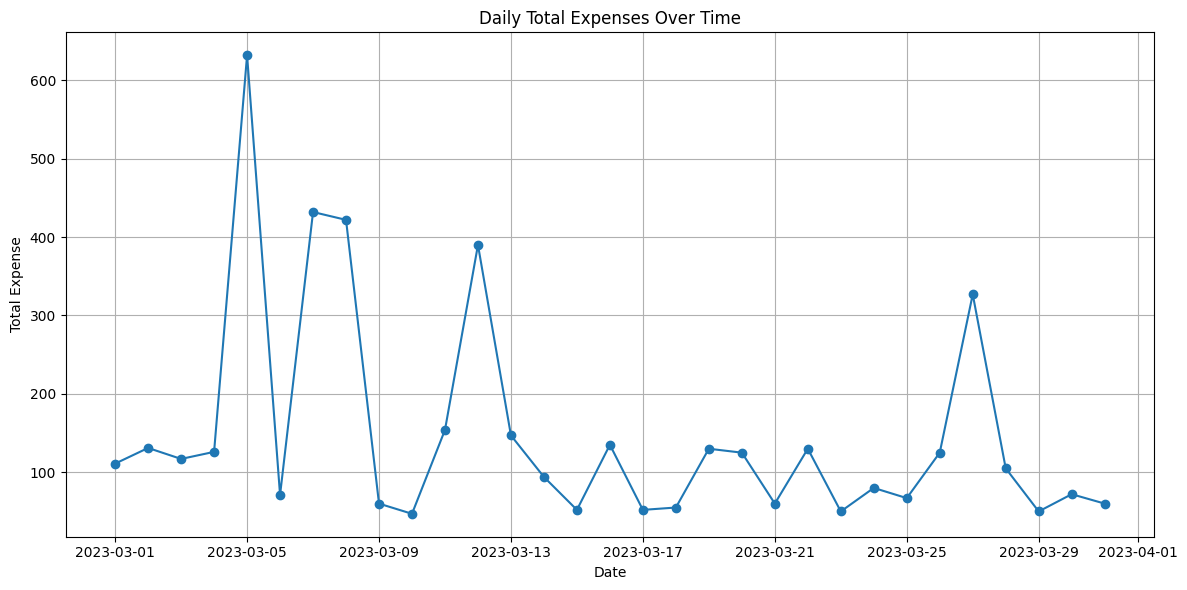

In [ ]:
# Group by date and sum up the expenses
daily_expenses = df.groupby('Date')['Amount'].sum().reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_expenses['Date'], daily_expenses['Amount'], marker='o', linestyle='-')
plt.title("Daily Total Expenses Over Time")
plt.xlabel("Date")
plt.ylabel("Total Expense")
plt.grid(True)
plt.tight_layout()

QUESTION 2


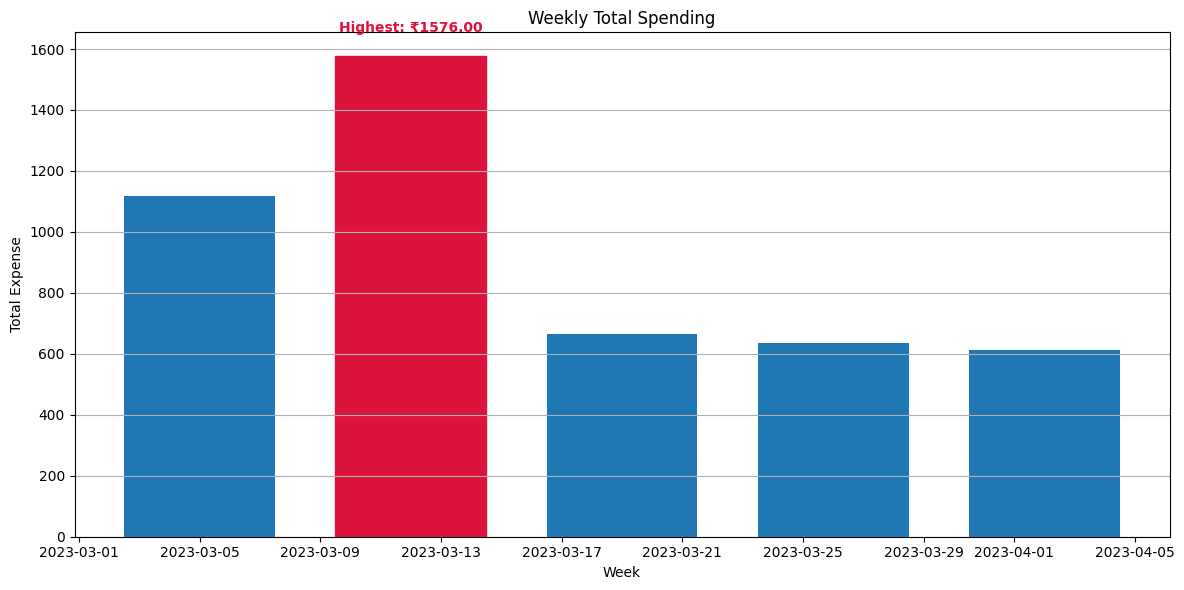

In [ ]:
# Calculate weekly total spending
weekly_totals = df['Amount'].resample('W').sum()

# Identify the week with the highest total spending
max_week = weekly_totals.idxmax()
max_amount = weekly_totals.max()

# Plot the weekly totals
plt.figure(figsize=(12, 6))
bars = plt.bar(weekly_totals.index, weekly_totals.values, width=5, align='center')

# Highlight the bar with highest spending
highlight_index = list(weekly_totals.index).index(max_week)
bars[highlight_index].set_color('crimson')

# Label the chart
plt.title("Weekly Total Spending")
plt.xlabel("Week")
plt.ylabel("Total Expense")
plt.grid(axis='y')

# Annotate the highest bar
plt.text(max_week, max_amount + max_amount*0.05,
         f'Highest: ₹{max_amount:.2f}', ha='center', color='crimson', fontweight='bold')

plt.tight_layout()

QUESTION 3


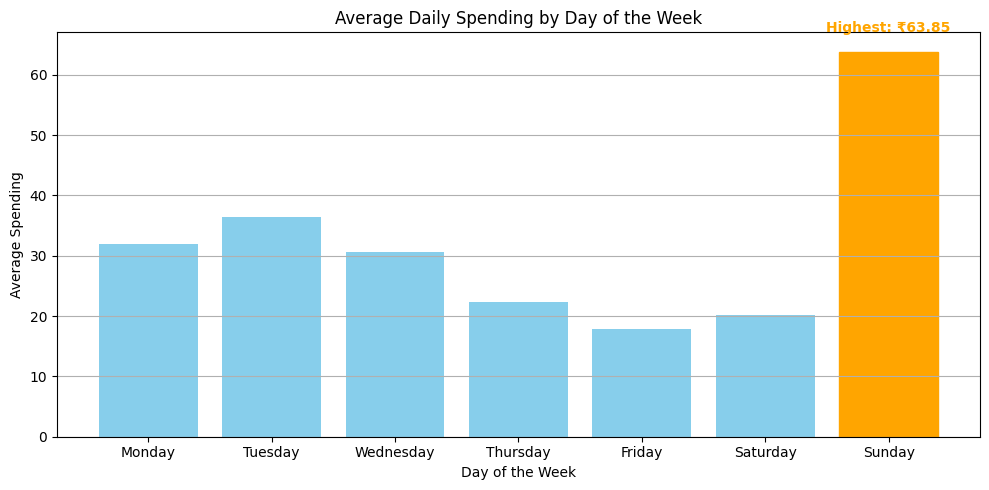

In [ ]:
# Group by day of the week and calculate average spending
avg_spending = df.groupby('Weekday')['Amount'].mean()

# Reorder the days for natural weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_spending = avg_spending.reindex(day_order)

# Identify the highest average
max_day = avg_spending.idxmax()
max_value = avg_spending.max()

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(avg_spending.index, avg_spending.values, color='skyblue')

# Highlight the max day
bars[day_order.index(max_day)].set_color('orange')

# Add annotation
plt.text(max_day, max_value + max_value*0.05,
         f'Highest: ₹{max_value:.2f}',
         ha='center', color='orange', fontweight='bold')

# Labels and title
plt.title("Average Daily Spending by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Spending")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

QUESTION 4


The most frequently purchased item is: chai with snaks (48 times)


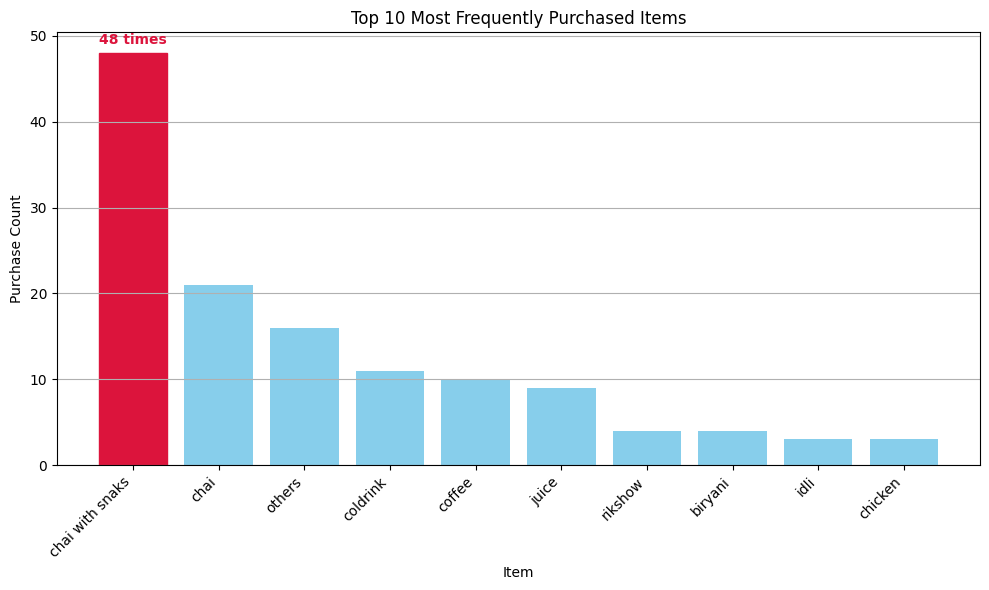

In [ ]:
# Get the most frequently purchased item
most_frequent_item = item_counts.idxmax()
most_frequent_count = item_counts.max()

# Plot top 10 most frequently purchased items
plt.figure(figsize=(10, 6))
bars = plt.bar(item_counts.head(10).index, item_counts.head(10).values, color='skyblue')
bars[0].set_color('crimson')  # Highlight the most frequent item

# Annotate the top item
plt.text(item_counts.index[0], item_counts.values[0] + 1,
         f'{most_frequent_count} times',
         ha='center', color='crimson', fontweight='bold')

plt.title("Top 10 Most Frequently Purchased Items")
plt.xlabel("Item")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

print(f"The most frequently purchased item is: {most_frequent_item} ({most_frequent_count} times)")

QUESTION 5

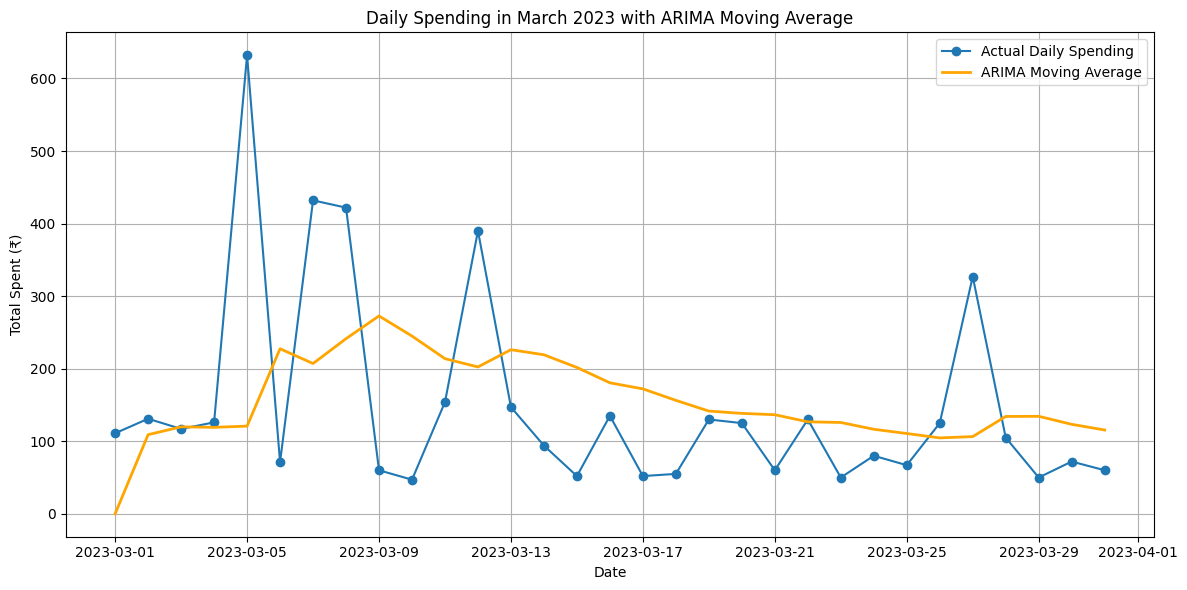

In [ ]:
# Filter data for March 2023
march_data = df[(df['Date'].dt.year == 2023) & (df['Date'].dt.month == 3)]

# Group by date to get total daily expenses
daily_total = march_data.groupby('Date')['Amount'].sum().asfreq('D').fillna(0)

# Fit ARIMA model for moving average approximation (ARIMA(p=1,d=1,q=1) is a common start)
model = ARIMA(daily_total, order=(1, 1, 1))
fitted_model = model.fit()

# Get predicted values (moving average)
moving_avg = fitted_model.predict(start=daily_total.index[0], end=daily_total.index[-1])

# Plot actual and moving average
plt.figure(figsize=(12, 6))
plt.plot(daily_total.index, daily_total.values, label='Actual Daily Spending', marker='o')
plt.plot(moving_avg.index, moving_avg.values, label='ARIMA Moving Average', color='orange', linewidth=2)
plt.title("Daily Spending in March 2023 with ARIMA Moving Average")
plt.xlabel("Date")
plt.ylabel("Total Spent (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()

QUESTION 6

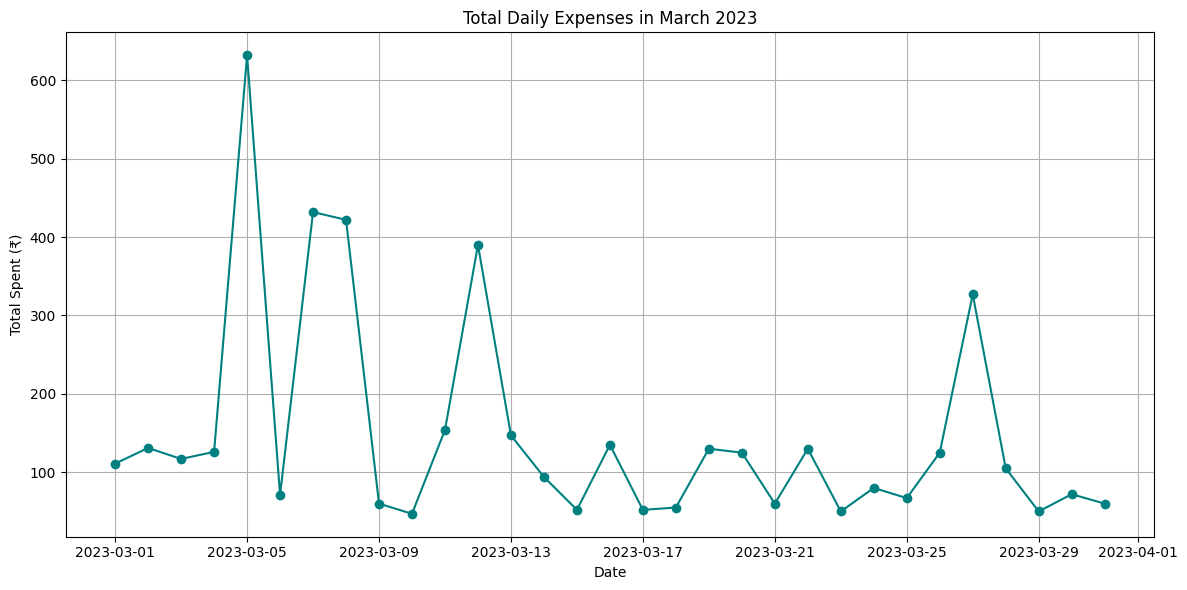

In [ ]:
# Group by date and sum the expenses
daily_total = march_data.groupby('Date')['Amount'].sum().reset_index()

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_total['Date'], daily_total['Amount'], marker='o', linestyle='-', color='teal')
plt.title("Total Daily Expenses in March 2023")
plt.xlabel("Date")
plt.ylabel("Total Spent (₹)")
plt.grid(True)
plt.tight_layout()

QUESTION 7

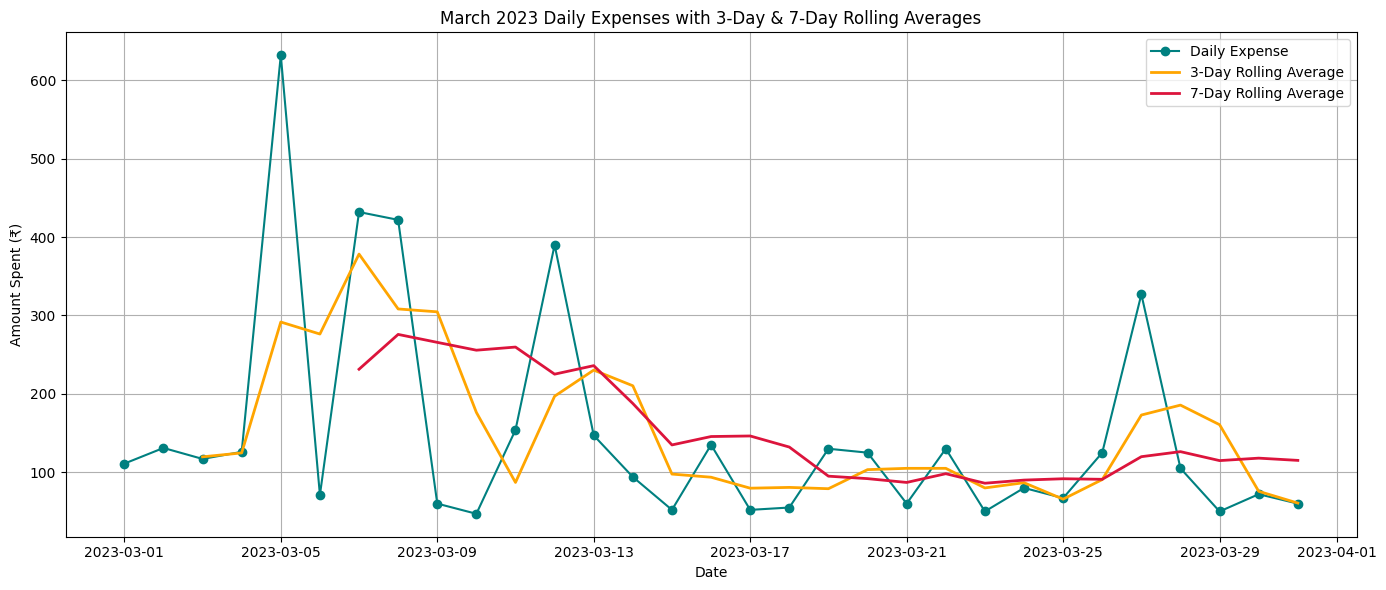

In [ ]:
# Calculate rolling averages
rolling_3 = daily_total.rolling(window=3).mean()
rolling_7 = daily_total.rolling(window=7).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_total.index, daily_total, label='Daily Expense', color='teal', marker='o')
plt.plot(rolling_3.index, rolling_3, label='3-Day Rolling Average', color='orange', linewidth=2)
plt.plot(rolling_7.index, rolling_7, label='7-Day Rolling Average', color='crimson', linewidth=2)

plt.title("March 2023 Daily Expenses with 3-Day & 7-Day Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Amount Spent (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()

QUESTION 8

ADF Statistic: -2.0648254683724594
p-value: 0.25889156352524395


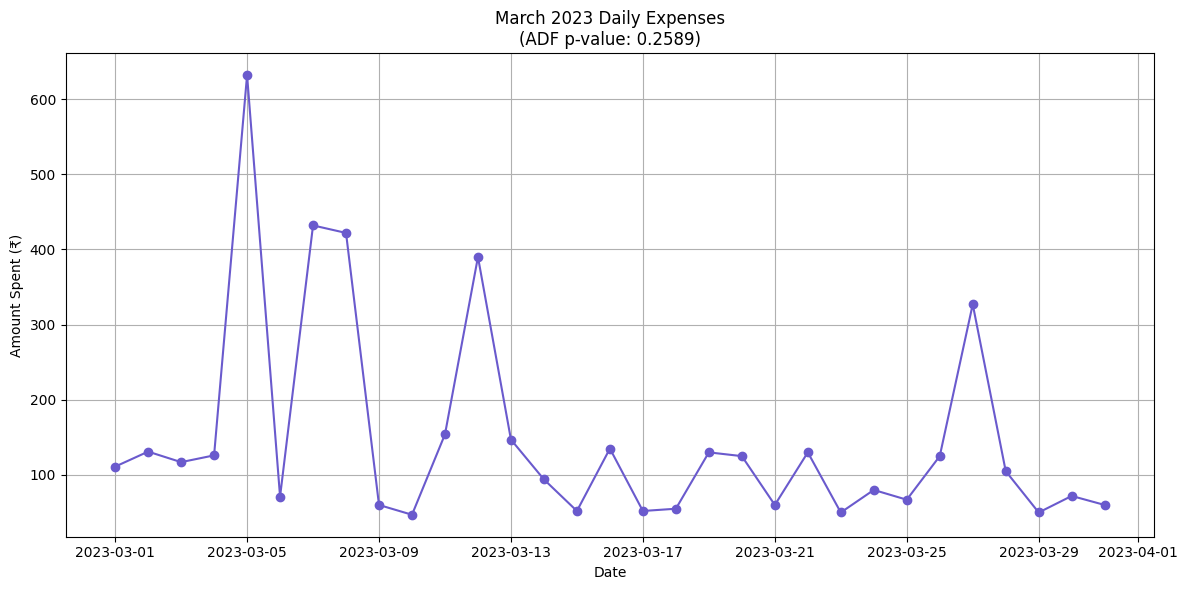

In [ ]:
# ADF Test
adf_result = adfuller(daily_total)
adf_stat, p_value = adf_result[0], adf_result[1]

# Print ADF results
print("ADF Statistic:", adf_stat)
print("p-value:", p_value)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_total.index, daily_total.values, marker='o', linestyle='-', color='slateblue')
plt.title("March 2023 Daily Expenses\n(ADF p-value: {:.4f})".format(p_value))
plt.xlabel("Date")
plt.ylabel("Amount Spent (₹)")
plt.grid(True)
plt.tight_layout()